In [27]:
import pandas as pd

# Replace 'your_dataset.csv' with the actual file path or URL of your dataset
file_path = r'C:\Users\sreej\OneDrive\Documents\Northeastern - Analytics\ALY 6020 Predictive Analysis\cardataset_mod2.csv'

# Read the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to inspect its structure
df.head()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n\n", missing_values)


Missing Values:

 MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64


In [6]:
# Check data types of columns
data_types = df.dtypes
print("\nData Types:\n", data_types)






Data Types:
 MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight            int64
Acceleration    float64
Model Year        int64
US Made           int64
dtype: object


In [10]:
# Convert 'Horsepower' to numeric, errors='coerce' will replace non-numeric values with NaN
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')

# Display the updated data types
data_types_updated = df.dtypes
print("\nUpdated Data Types:\n", data_types_updated)



Updated Data Types:
 MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Model Year        int64
US Made           int64
dtype: object


In [7]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
print("\nNumber of Duplicate Rows:", duplicate_rows.sum())

# If there are duplicate rows, you may choose to drop them
df.drop_duplicates(inplace=True)



Number of Duplicate Rows: 0


In [8]:
# Display basic statistics of numerical columns
statistics = df.describe()
print("\nStatistics:\n", statistics)


Statistics:
               MPG   Cylinders  Displacement       Weight  Acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       Model Year     US Made  
count  398.000000  398.000000  
mean    76.010050    0.625628  
std      3.697627    0.484569  
min     70.000000    0.000000  
25%     73.000000    0.000000  
50%     76.000000    1.000000  
75%     79.000000    1.000000  
max     82.000000    1.000000  


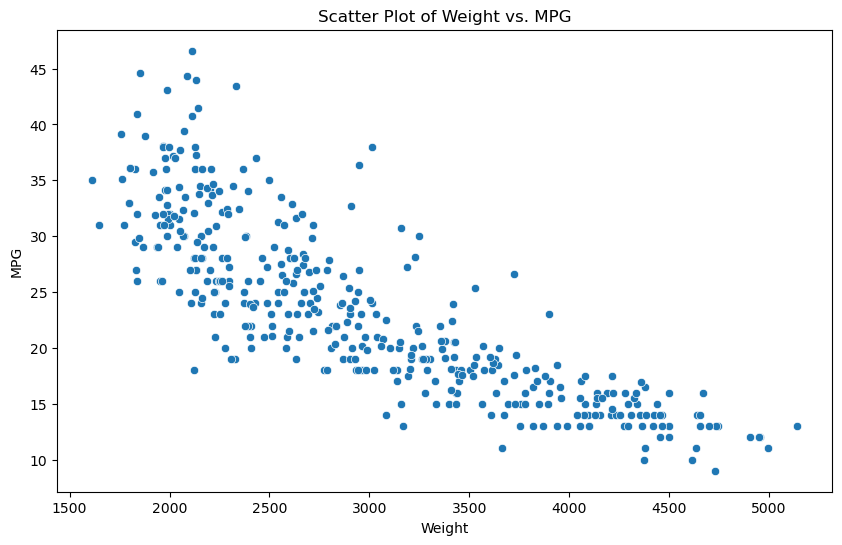

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


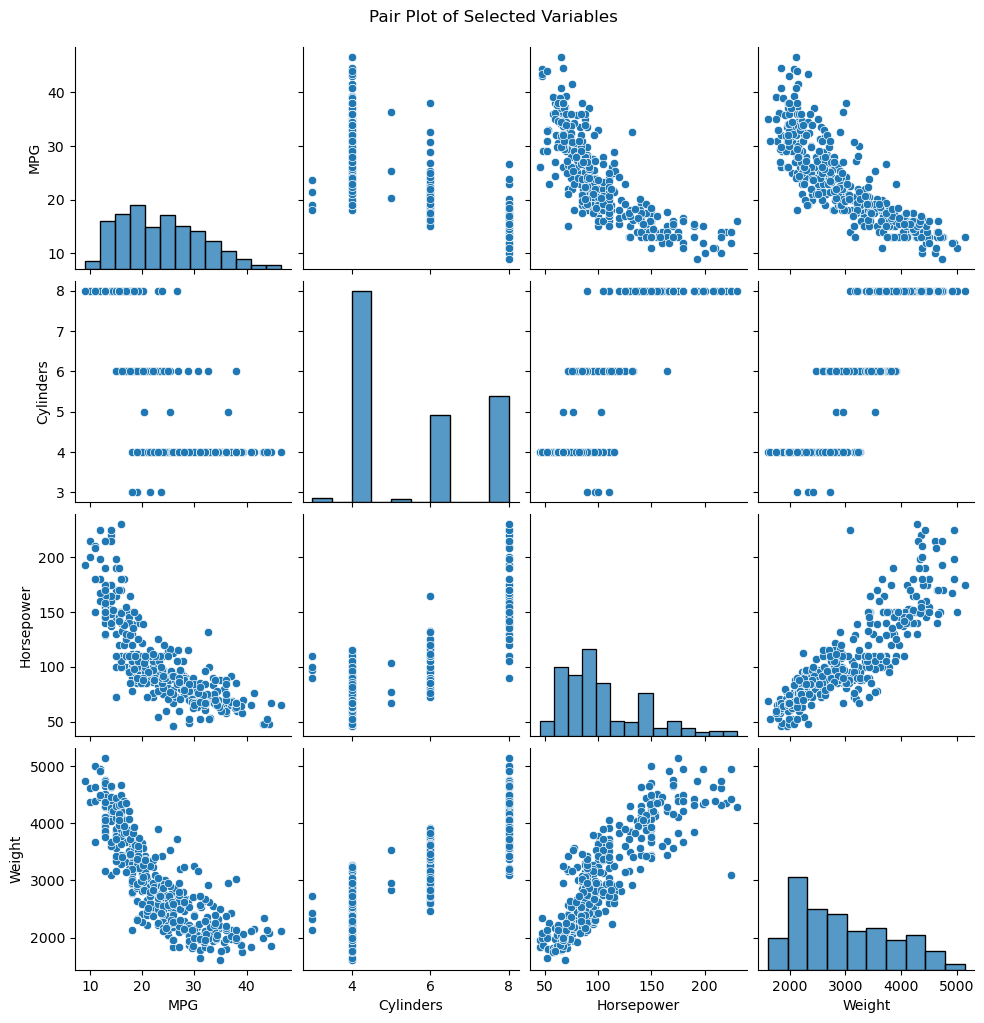

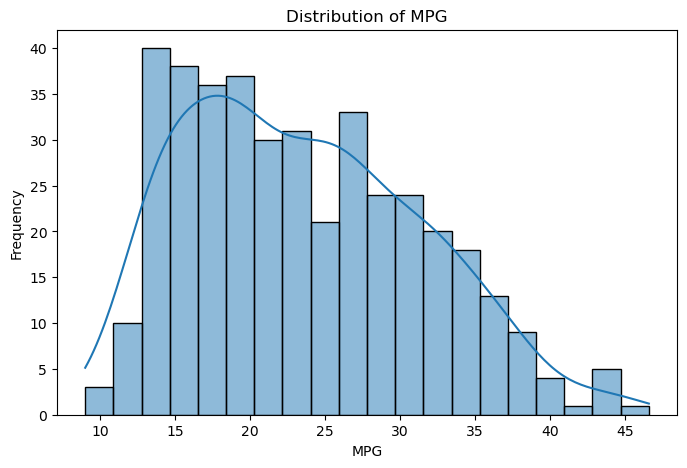

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Scatter plot between 'Weight' and 'MPG'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight', y='MPG', data=car_data)
plt.title('Scatter Plot of Weight vs. MPG')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

# Example: Pair plot for selected variables
selected_variables = ['MPG', 'Cylinders', 'Horsepower', 'Weight']
sns.pairplot(car_data[selected_variables])
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()

# Example: Distribution plot for 'MPG'
plt.figure(figsize=(8, 5))
sns.histplot(car_data['MPG'], bins=20, kde=True)
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()


In [63]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assume 'df' is your cleaned and preprocessed dataset

# Select relevant variables
selected_features = ['Cylinders', 'Displacement', 'Horsepower', 'Weight']

# Independent variables (X) and dependent variable (Y)
X = df[selected_features]
Y = df['MPG']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print("Multiple Linear Regression Results:")
print("R-squared:", r_squared)
print("Mean Squared Error:", mse)
print("\nSummary of the Regression Model:")
print(model.summary())


Multiple Linear Regression Results:
R-squared: 0.7277116237641643
Mean Squared Error: 14.639977664662897

Summary of the Regression Model:
                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     181.9
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           2.48e-80
Time:                        14:39:44   Log-Likelihood:                -918.21
No. Observations:                 318   AIC:                             1846.
Df Residuals:                     313   BIC:                             1865.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025   

In [64]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Custom function for stepwise selection
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out = 0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # Forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # Backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

# Assuming X and Y are your data and target variable
selected_features = stepwise_selection(X, Y)

# Display the selected features
print("Selected Features:", selected_features)


Add  const                          with p-value 3.08429e-201
Add  Weight                         with p-value 2.9728e-103
Add  Horsepower                     with p-value 7.86004e-05
Selected Features: ['const', 'Weight', 'Horsepower']


In [66]:
import statsmodels.api as sm

# Assuming you have the DataFrame 'car_data' with the relevant columns

# Perform stepwise selection
selected_features = ['Weight', 'Horsepower']
X_stepwise = sm.add_constant(df[selected_features])
y_stepwise = df['MPG']

# Fit the OLS model after stepwise selection
model_stepwise = sm.OLS(y_stepwise, X_stepwise).fit()

# Display the summary of the model
print(model_stepwise.summary())


                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     469.1
Date:                Sun, 21 Jan 2024   Prob (F-statistic):          4.53e-105
Time:                        15:41:17   Log-Likelihood:                -1140.5
No. Observations:                 398   AIC:                             2287.
Df Residuals:                     395   BIC:                             2299.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.8415      0.790     58.047      0.0

In [67]:
! pip install prettytable


  Obtaining dependency information for prettytable from https://files.pythonhosted.org/packages/4d/81/316b6a55a0d1f327d04cc7b0ba9d04058cb62de6c3a4d4b0df280cbe3b0b/prettytable-3.9.0-py3-none-any.whl.metadata


In [68]:
from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()

# Define the column names
table.field_names = ["Model", "Variables Included", "R-squared", "AIC", "Significant Variables"]

# Add data rows
table.add_row(["Stepwise Selection", "'const', 'Weight', 'Horsepower'", 0.704, 2287.0, "'const', 'Weight', 'Horsepower'"])
table.add_row(["Initial Model", "'const', 'Cylinders', 'Displacement', 'Horsepower', 'Weight'", 0.699, 1846.0, "'const', 'Horsepower', 'Weight'"])

# Print the table
print(table)


+--------------------+--------------------------------------------------------------+-----------+--------+---------------------------------+
|       Model        |                      Variables Included                      | R-squared |  AIC   |      Significant Variables      |
+--------------------+--------------------------------------------------------------+-----------+--------+---------------------------------+
| Stepwise Selection |               'const', 'Weight', 'Horsepower'                |   0.704   | 2287.0 | 'const', 'Weight', 'Horsepower' |
|   Initial Model    | 'const', 'Cylinders', 'Displacement', 'Horsepower', 'Weight' |   0.699   | 1846.0 | 'const', 'Horsepower', 'Weight' |
+--------------------+--------------------------------------------------------------+-----------+--------+---------------------------------+
